# SuperAI Season 4 - Level Individual Hackathon - Sleep Stages Classification

In [1]:
%pwd
%cd ../workspaces/Sleep_Stages_Classification

/lustrefs/disk/project/lt200280-saillm/saiwat_proj/tee/kaggle/workspaces/Sleep_Stages_Classification


## Data Exploration

### Sample

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [51]:
sample_train = pd.read_csv('./datasets/train/train050.csv')

In [52]:
sample_train

,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Sleep_Stage
0,21.04,34.0,37.0,37.0,36.21,0.120402,74.47,0.90625,W
1,17.37,34.0,37.0,37.0,36.21,0.120402,74.47,0.90625,W
2,13.86,34.0,37.0,37.0,36.21,0.120402,74.47,0.90625,W
3,10.60,34.0,37.0,37.0,36.21,0.120402,74.47,0.90625,W
4,7.72,34.0,37.0,38.0,36.21,0.120402,74.47,0.90625,W
...,...,...,...,...,...,...,...,...,...
1576315,-94.68,36.0,-40.0,32.0,35.37,0.066605,71.07,0.78125,N
1576316,-105.45,37.0,-40.0,32.0,35.37,0.066605,71.07,0.78125,N
1576317,-116.88,37.0,-40.0,32.0,35.37,0.066605,71.07,0.78125,N
1576318,-128.32,38.0,-40.0,32.0,35.37,0.066605,71.07,0.78125,N


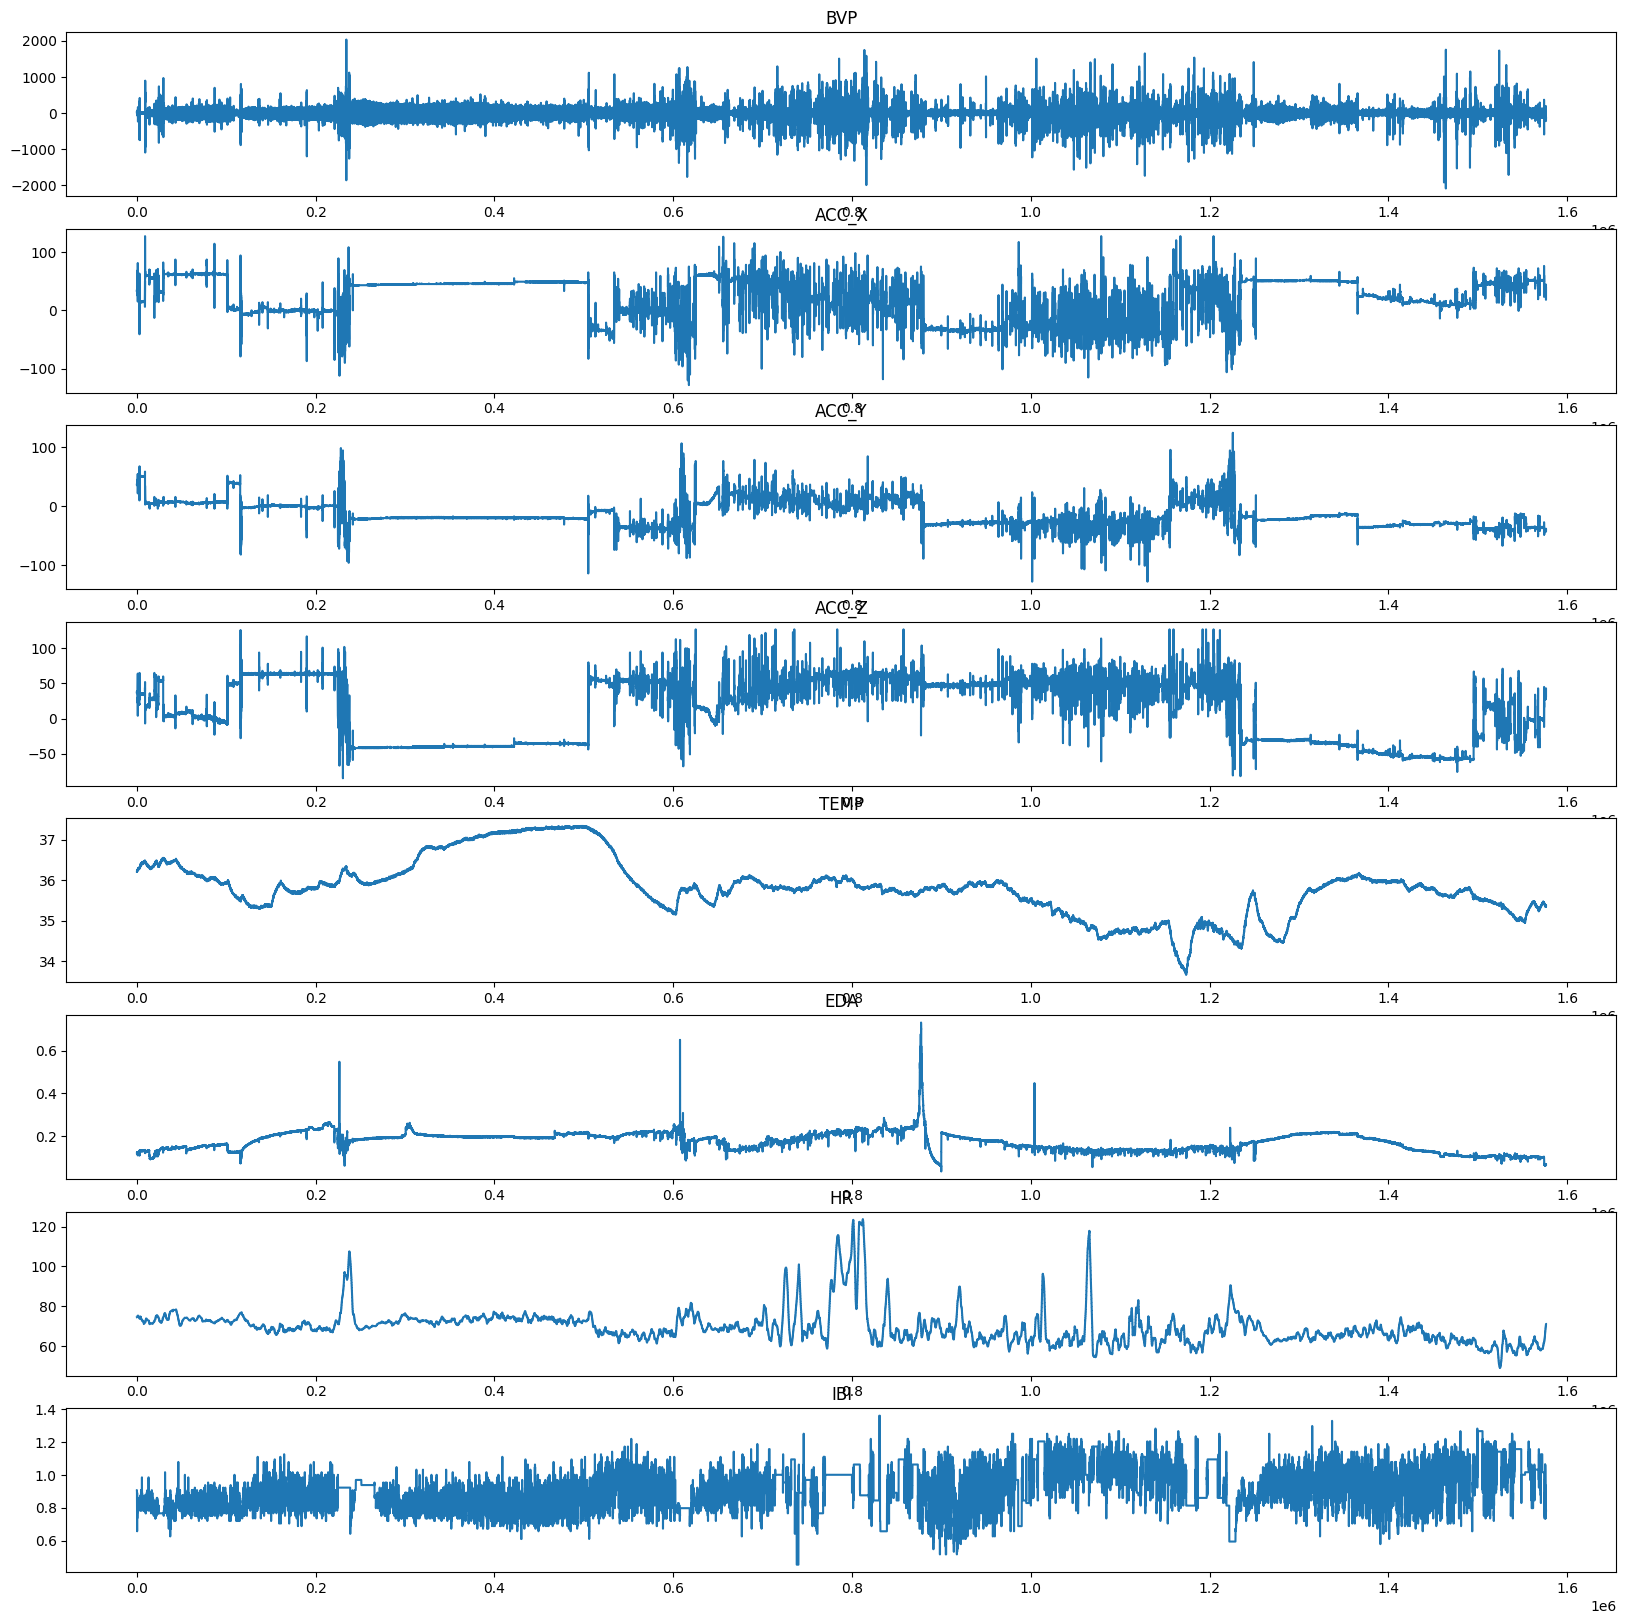

In [53]:
fig , axes = plt.subplots(8 , 1 , figsize = (20 , 20))

for idx , col in enumerate (sample_train.drop(columns = ['Sleep_Stage']).columns) :
    
    axes[idx].plot(sample_train[col])
    axes[idx].set_title(col)

plt.show()

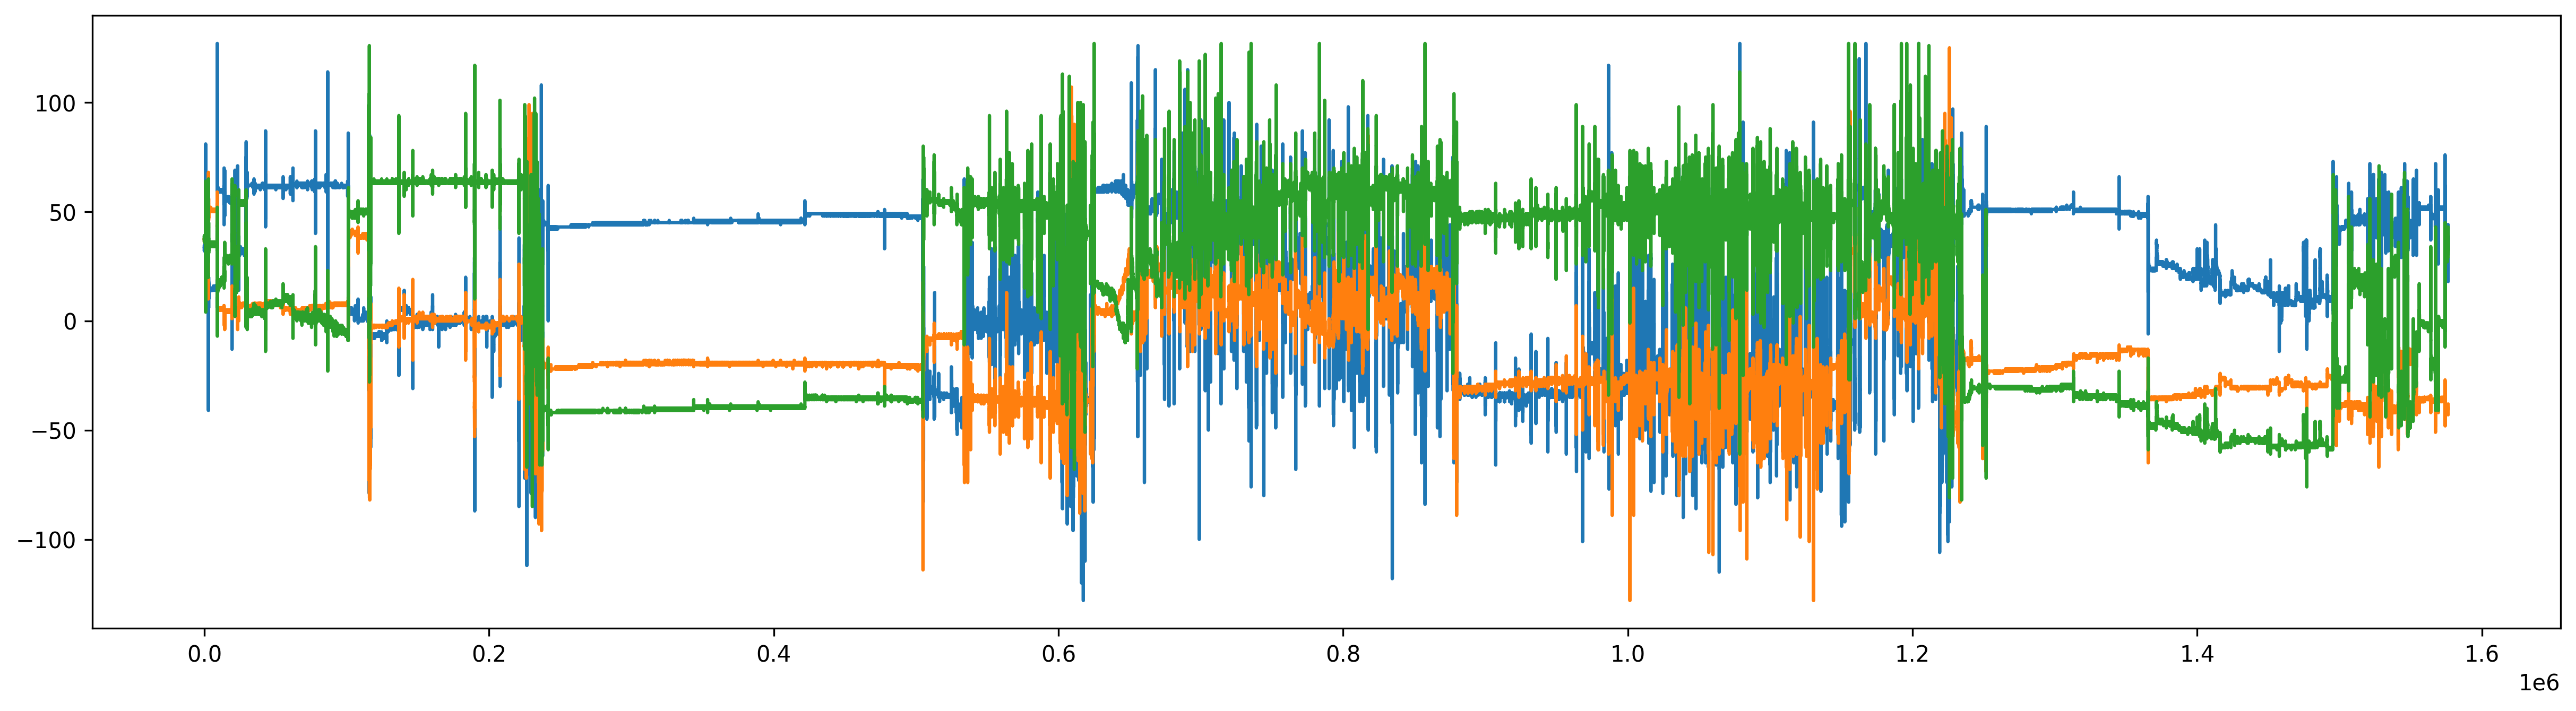

In [54]:
figure(figsize=(20 , 5), dpi=300)

for idx , col in enumerate (sample_train.columns[1 : 4]) :
    
    plt.plot(sample_train[col])

plt.show()

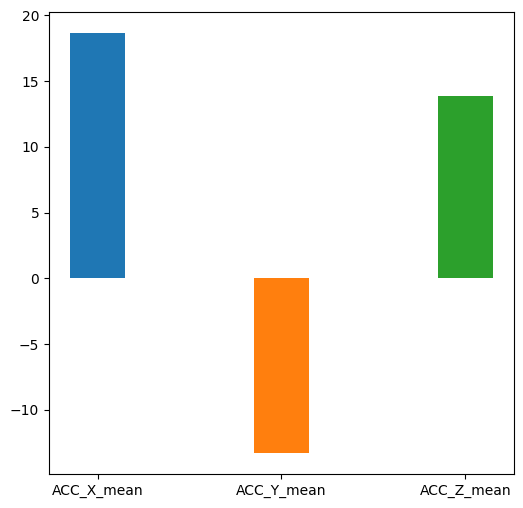

In [55]:
figure(figsize=(6 , 6), dpi=100)

for idx , col in enumerate(sample_train.columns[1 : 4]):
    
    plt.bar(f'{col}_mean' , sample_train[col].mean() ,  width=0.3)
    
plt.show()

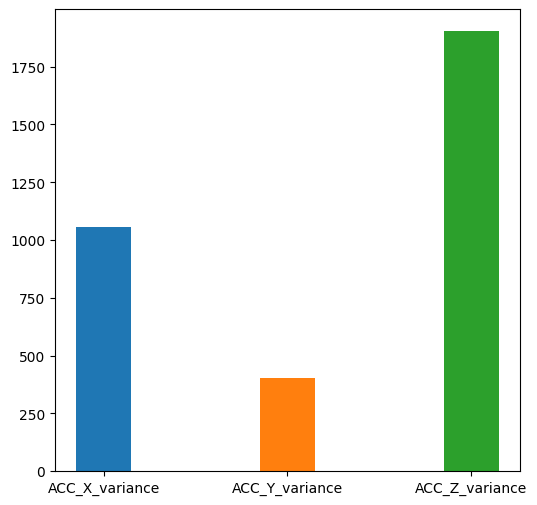

In [56]:
figure(figsize=(6 , 6), dpi=100)

for idx , col in enumerate(sample_train.columns[1 : 4]):
    
    plt.bar(f'{col}_variance' , sample_train[col].var() ,  width=0.3)
    
plt.show()

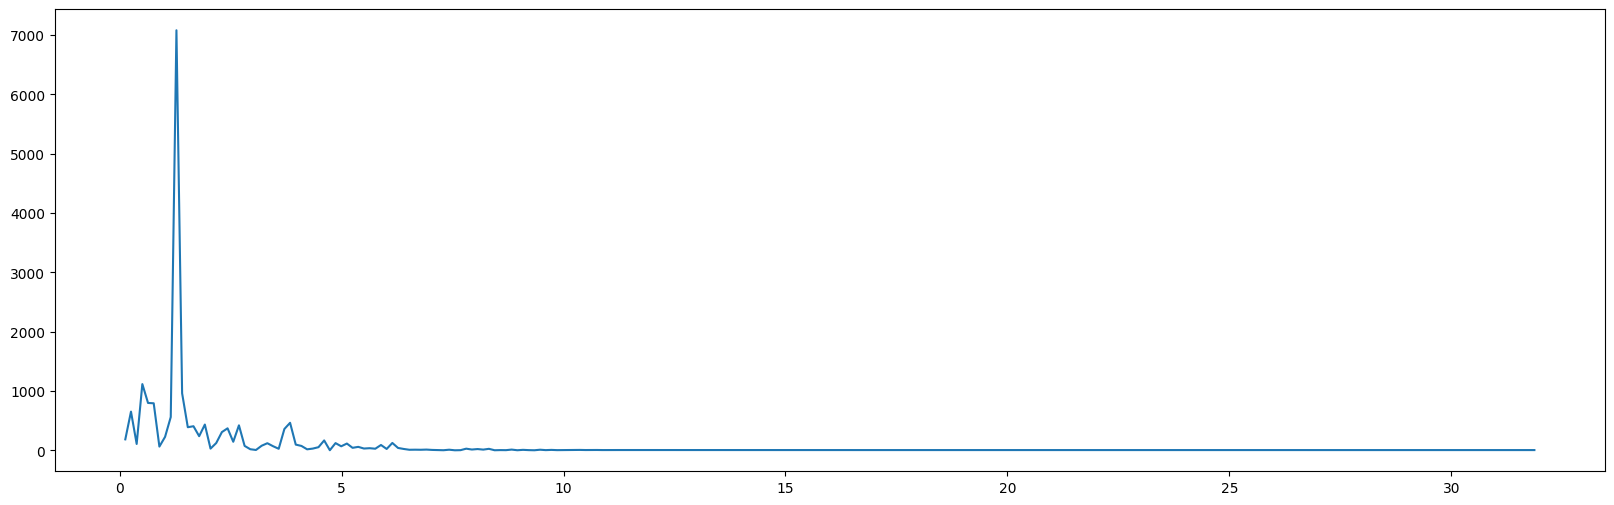

In [57]:
figure(figsize=(20 , 6), dpi=100)

start = 1
divide = 2

for idx , col in enumerate (sample_train.columns[ : 1]) :
    
    mag = np.fft.fft(sample_train[col][ : 500])
    freq = np.fft.fftfreq(len(sample_train[col][ : 500])) * 64
    
    plt.plot(freq[start : len(freq) // divide] , np.abs(mag.real[start : len(freq) // divide]))

plt.show()

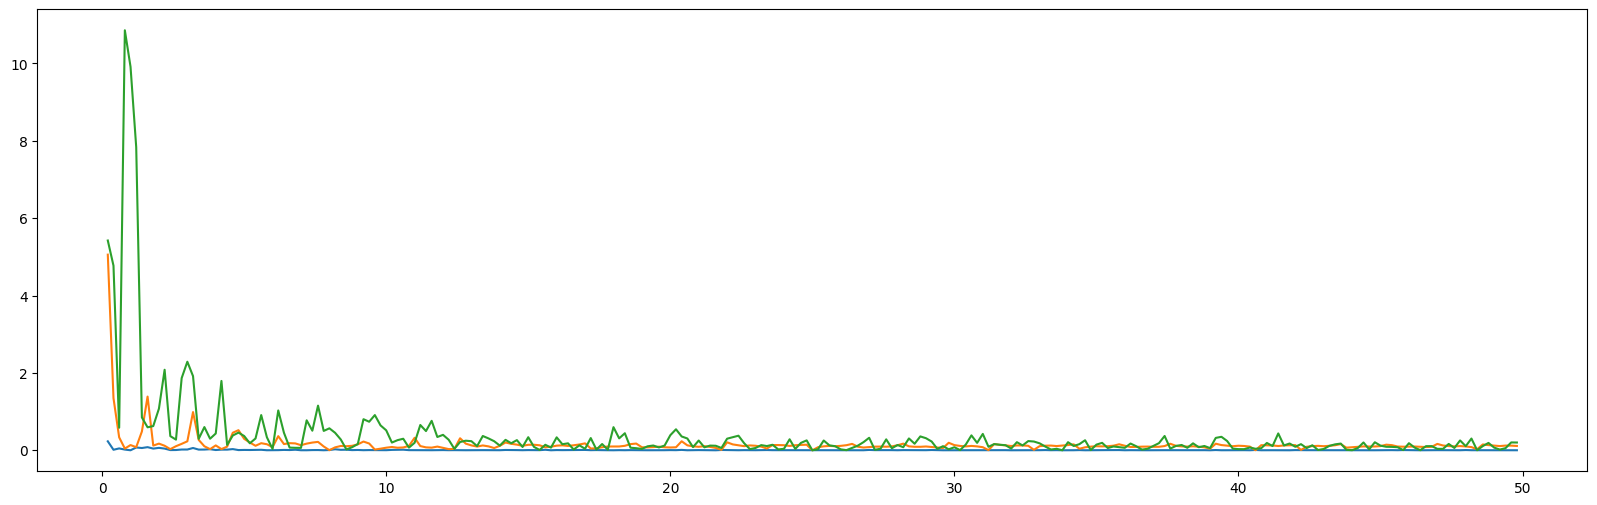

In [58]:
figure(figsize=(20 , 6), dpi=100)

start = 1
divide = 2

for idx , col in enumerate (sample_train.columns[5 : 8]) :
    
    mag = np.fft.fft(sample_train[col][ : 500])
    freq = np.fft.fftfreq(len(sample_train[col][ : 500])) * 100
    
    plt.plot(freq[start : len(freq) // divide] , np.abs(mag.real[start : len(freq) // divide]))

plt.show()

### Cutting 30 Seconds (1920 Rows)

In [66]:
import glob
from tqdm.notebook import tqdm

In [92]:
idx = 0
 
for file_path in tqdm(sorted(glob.glob('./datasets/train/*'))) :
    
    df = pd.read_csv(file_path)
    
    for i in range(0 , len(df) , 1920) : 
        
        label = df.iloc[i]['Sleep_Stage']
        
        cropped_df = df.iloc[i : i + 1920]
        cropped_df.to_csv(f'./database/{label}/{idx}.csv' , index = False)
        
        idx += 1 
        

  0%|          | 0/83 [00:00<?, ?it/s]

### All Classes

In [93]:
import glob
import os
from matplotlib.pyplot import figure

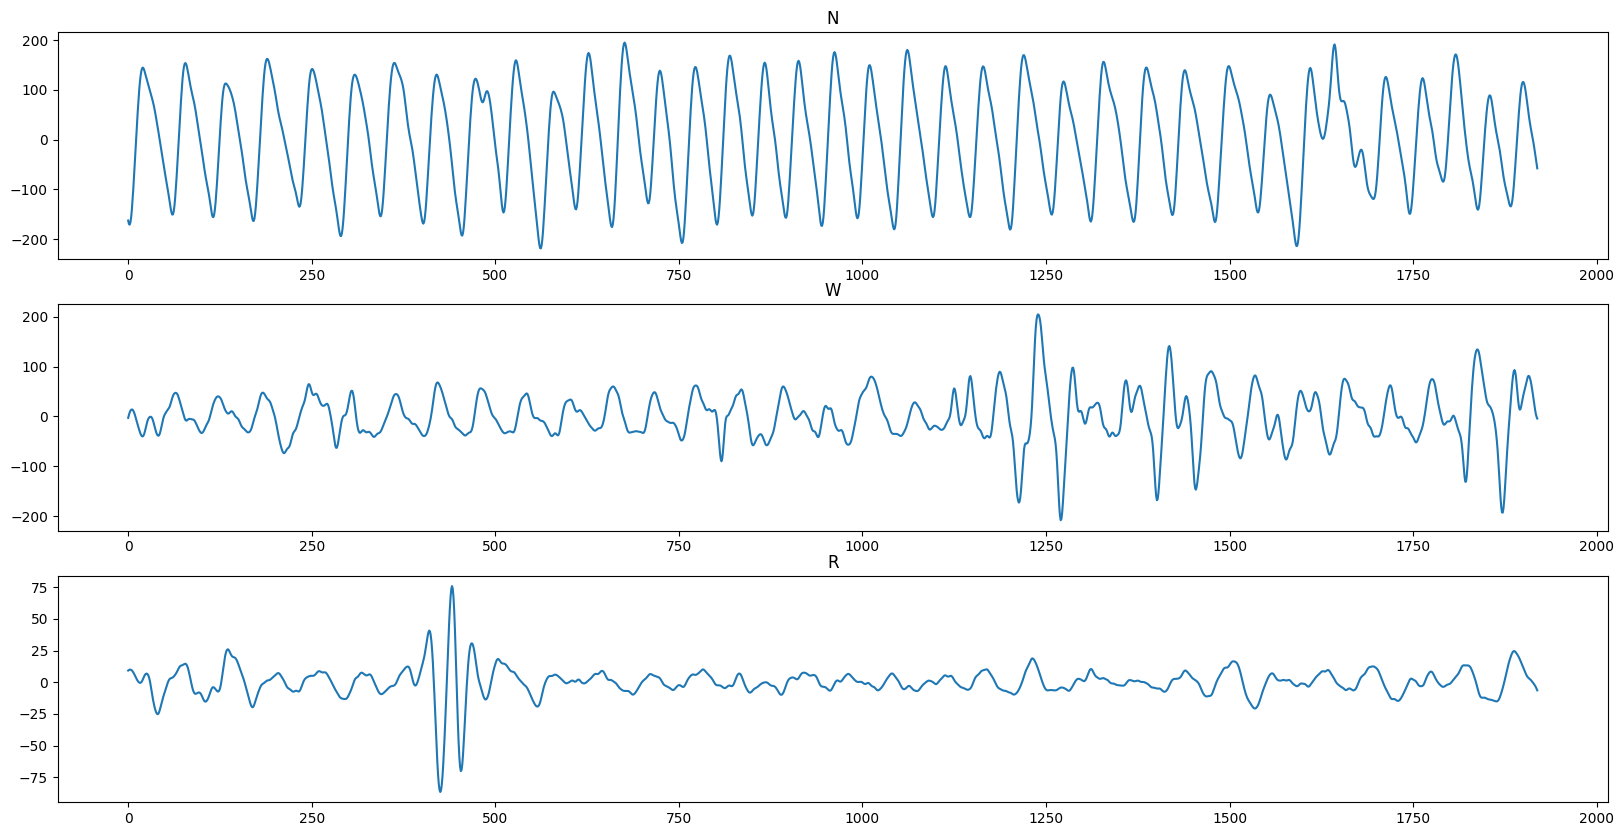

In [94]:
fig , axes = plt.subplots(3 , 1 , figsize = (20 , 10))

for row , class_ in enumerate(os.listdir('./database')) :
    
    file = glob.glob(f'./database/{class_}/*')[0]
    
    df = pd.read_csv(file)
    
    for col in df.columns[0 : 1] :
        
        axes[row].plot(df[col])
        axes[row].set_title(class_)

plt.show()

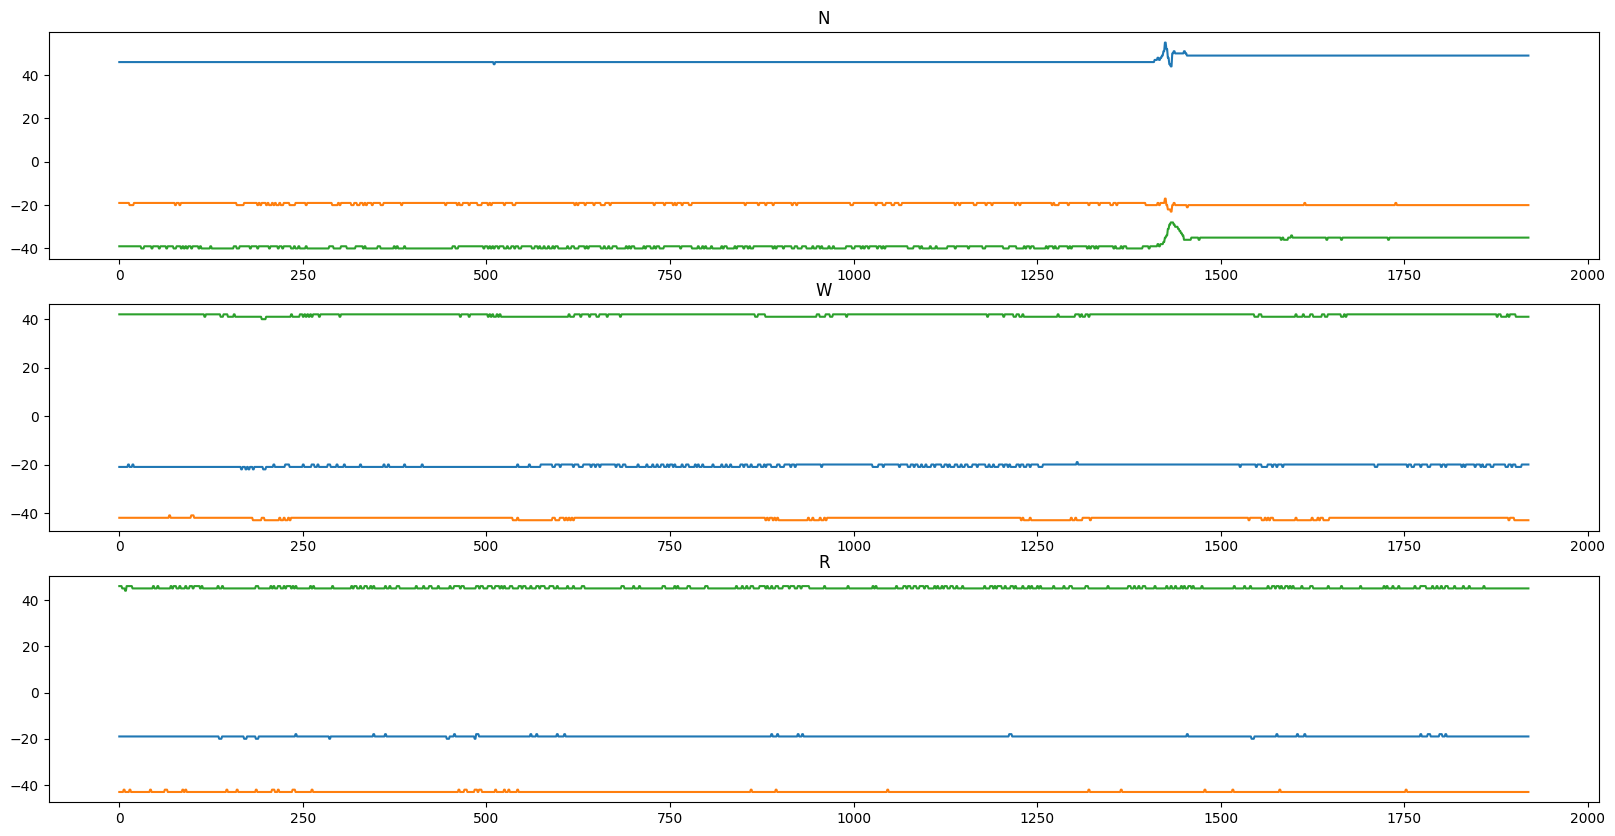

In [95]:
fig , axes = plt.subplots(3 , 1 , figsize = (20 , 10))

for row , class_ in enumerate(os.listdir('./database')) :
    
    file = glob.glob(f'./database/{class_}/*')[0]
    
    df = pd.read_csv(file)
    
    for col in df.columns[1 : 4] :
        
        axes[row].plot(df[col])
        axes[row].set_title(class_)

plt.show()

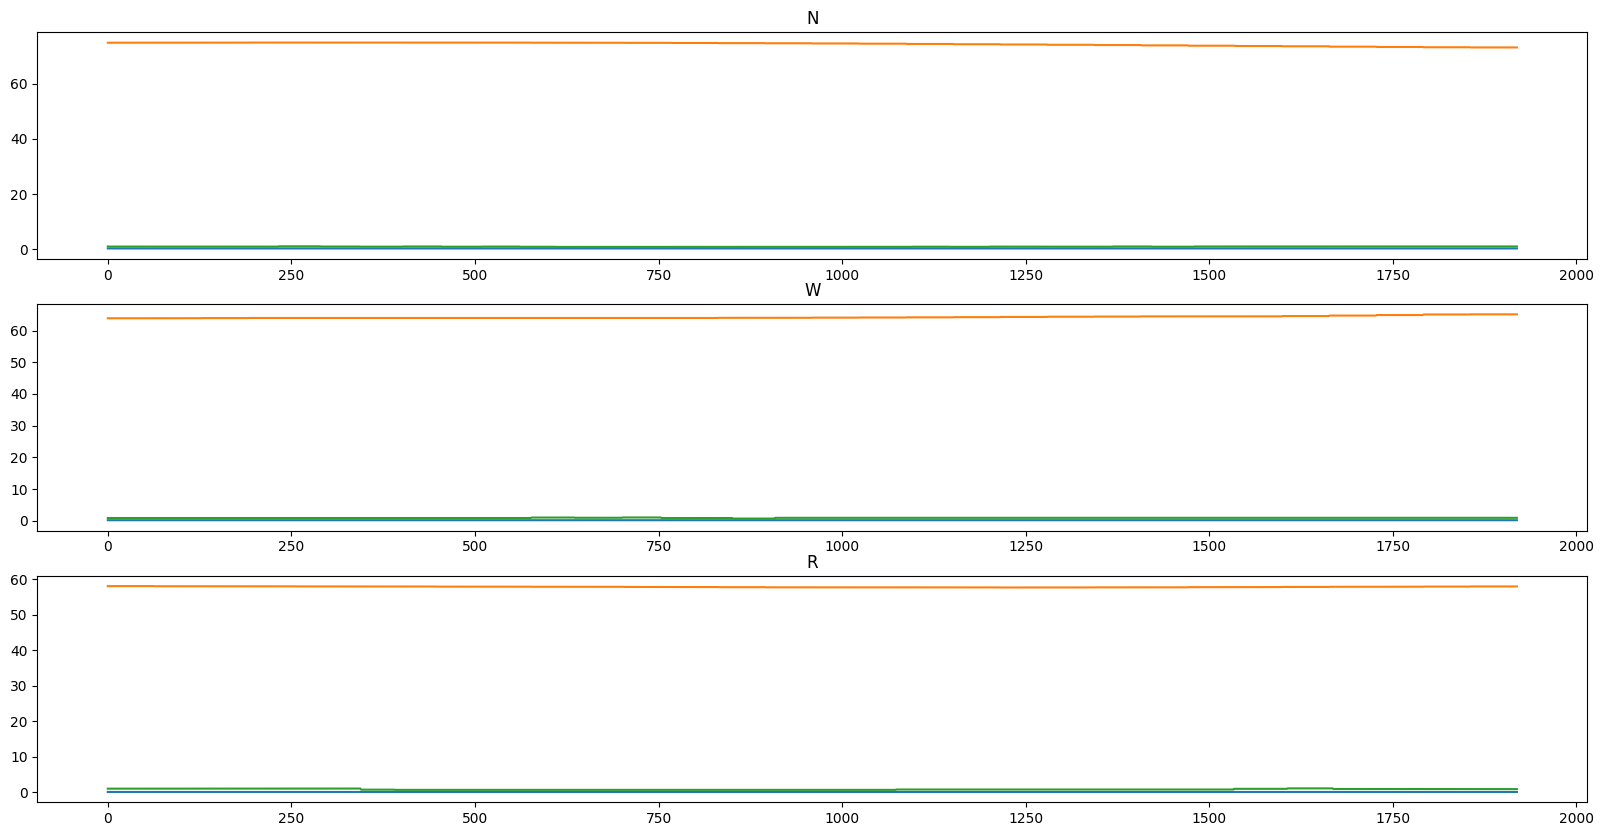

In [96]:
fig , axes = plt.subplots(3 , 1 , figsize = (20 , 10))

for row , class_ in enumerate(os.listdir('./database')) :
    
    file = glob.glob(f'./database/{class_}/*')[0]
    
    df = pd.read_csv(file)
    
    for col in df.columns[5 : 8] :
        
        axes[row].plot(df[col])
        axes[row].set_title(class_)

plt.show()

### Features Engineering

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [184]:
def raw_to_features(df , index) :
    
    freq = np.fft.fftfreq(1920) * 64

    start = 5
    divide = 2
    
    features = dict([])
    
    for idx , col in enumerate(df.columns) :
        
        features[f'{col}_mean'] = df[col].mean()
        features[f'{col}_std']  = df[col].std()
        features[f'{col}_var']  = df[col].var()
        
        features[f'{col}_fourier_mean'] = (np.abs(np.fft.fft(df[col])[start:len(df[col]) // divide]).real).mean()
        features[f'{col}_fourier_std']  = (np.abs(np.fft.fft(df[col])[start:len(df[col]) // divide]).real).std()
        features[f'{col}_fourier_var']  = (np.abs(np.fft.fft(df[col])[start:len(df[col]) // divide]).real).var()
    
    result_df = pd.DataFrame(features, index = [index])
    
    return result_df

In [185]:
sample_N_df = pd.read_csv('./database/N/91.csv')

In [186]:
sample_N_df

,BVP,ACC_X,ACC_Y,ACC_Z,TEMP,EDA,HR,IBI,Sleep_Stage
0,-6.27,-21.0,-25.0,56.0,32.39,0.078128,67.33,1.00000,N
1,-6.88,-21.0,-25.0,56.0,32.39,0.078128,67.33,1.00000,N
2,-7.32,-21.0,-25.0,56.0,32.39,0.078128,67.33,1.00000,N
3,-7.68,-21.0,-25.0,56.0,32.39,0.078128,67.33,1.00000,N
4,-8.08,-21.0,-25.0,56.0,32.39,0.078128,67.33,1.00000,N
...,...,...,...,...,...,...,...,...,...
1915,5.48,-21.0,-25.0,56.0,32.41,0.080690,66.88,0.96875,N
1916,5.28,-22.0,-24.0,56.0,32.41,0.080690,66.88,0.96875,N
1917,5.00,-22.0,-24.0,56.0,32.41,0.080690,66.88,0.96875,N
1918,4.66,-22.0,-24.0,56.0,32.41,0.080690,66.88,0.96875,N


In [187]:
sample_features_df = raw_to_features(sample_N_df.drop(columns = ['Sleep_Stage']) , 0)
sample_features_df['labels'] = sample_N_df['Sleep_Stage']
sample_features_df

,BVP_mean,BVP_std,BVP_var,BVP_fourier_mean,BVP_fourier_std,BVP_fourier_var,ACC_X_mean,ACC_X_std,ACC_X_var,ACC_X_fourier_mean,...,HR_fourier_mean,HR_fourier_std,HR_fourier_var,IBI_mean,IBI_std,IBI_var,IBI_fourier_mean,IBI_fourier_std,IBI_fourier_var,labels
0,0.009995,6.182703,38.225811,69.824187,262.359785,68832.657042,-21.389583,0.619549,0.383841,17.906747,...,0.81875,1.951374,3.80786,0.943823,0.053203,0.002831,0.75836,2.102715,4.421409,N


In [188]:
lst = []

for file_path in tqdm(sorted(glob.glob('./database/*/*'))) : 
    
    df = pd.read_csv(file_path)
    features_df = raw_to_features(df.drop(columns = ['Sleep_Stage']) , 0)
    features_df['labels'] = df['Sleep_Stage']
    
    lst.append(features_df)

train_df = pd.concat(lst)
train_df.index = pd.Series(np.arange(len(train_df)))
train_df.index.name = 'id'

  0%|          | 0/66607 [00:00<?, ?it/s]

In [189]:
train_df

,BVP_mean,BVP_std,BVP_var,BVP_fourier_mean,BVP_fourier_std,BVP_fourier_var,ACC_X_mean,ACC_X_std,ACC_X_var,ACC_X_fourier_mean,...,HR_fourier_mean,HR_fourier_std,HR_fourier_var,IBI_mean,IBI_std,IBI_var,IBI_fourier_mean,IBI_fourier_std,IBI_fourier_var,labels
id,,,,,,,,,,,,,,,,,,,,,
0,-0.050891,6.152547,37.853835,76.901018,258.673169,6.691181e+04,-22.307292,1.207217,1.457373,29.173092,...,0.535189,1.257757,1.581953,0.948454,0.035325,0.001248,0.423092,1.216387,1.479598,N
1,-0.399526,25.631877,656.993120,289.009844,1086.620940,1.180745e+06,-29.304167,5.334578,28.457721,82.178771,...,0.303295,0.756805,0.572754,0.848413,0.040995,0.001681,0.432323,1.464830,2.145726,N
2,0.354896,30.847567,951.572420,389.327588,1294.093877,1.674679e+06,-34.197917,7.444664,55.423028,57.987196,...,1.105323,2.751182,7.569001,0.950041,0.145537,0.021181,1.038519,2.770704,7.676799,N
3,-0.163359,22.015821,484.696379,265.896217,928.742774,8.625631e+05,-30.896875,0.307608,0.094623,9.310761,...,6.456285,15.704538,246.632500,0.927645,0.096711,0.009353,1.031700,2.743268,7.525522,N
4,0.498125,74.225244,5509.386861,797.823833,3157.067809,9.967077e+06,55.893750,0.414890,0.172134,11.140738,...,0.356047,0.793244,0.629236,1.092131,0.073006,0.005330,0.685449,1.972980,3.892651,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66602,0.239521,98.595522,9721.076864,897.562914,4234.649746,1.793226e+07,-26.696875,2.195450,4.820001,27.883002,...,0.785387,1.927049,3.713519,1.066577,0.045628,0.002082,0.570096,1.748944,3.058803,W
66603,0.027302,72.452481,5249.362038,791.682779,3081.907449,9.498154e+06,33.102083,0.302837,0.091710,9.918057,...,0.636750,1.551004,2.405614,1.050570,0.051430,0.002645,0.612762,1.719145,2.955460,W
66604,0.137984,73.063764,5338.313662,631.434625,3145.495632,9.894143e+06,-23.590625,0.491847,0.241913,15.494685,...,0.382711,0.894516,0.800159,1.035083,0.052774,0.002785,0.555918,1.576953,2.486782,W


In [190]:
lst = []

for file_path in tqdm(sorted(glob.glob('./datasets/test/test_segment/*/*'))) : 
    
    df = pd.read_csv(file_path)
    features_df = raw_to_features(df , 0)
    
    lst.append(features_df)

test_df = pd.concat(lst)

  0%|          | 0/7970 [00:00<?, ?it/s]

In [191]:
index = [ file_path.split('/')[-1].split('.')[0] for file_path in sorted(glob.glob('./datasets/test/test_segment/*/*'))]
test_df.index = pd.Series(index)
test_df.index.name = 'id'
test_df

,BVP_mean,BVP_std,BVP_var,BVP_fourier_mean,BVP_fourier_std,BVP_fourier_var,ACC_X_mean,ACC_X_std,ACC_X_var,ACC_X_fourier_mean,...,HR_var,HR_fourier_mean,HR_fourier_std,HR_fourier_var,IBI_mean,IBI_std,IBI_var,IBI_fourier_mean,IBI_fourier_std,IBI_fourier_var
id,,,,,,,,,,,,,,,,,,,,,
test001_00000,-0.686937,127.436554,16240.075323,1302.626257,5439.758100,2.959097e+07,-4.971875,0.194346,0.037770,6.565813,...,0.597198,4.526040,11.104555,123.311151,0.863452,0.033308,0.001109,3.165966e-01,9.814137e-01,9.631729e-01
test001_00001,1.345115,133.275409,17762.334564,1037.138214,5756.462036,3.313686e+07,-4.964583,0.184879,0.034180,6.168299,...,0.017420,0.327850,0.761334,0.579630,0.918628,0.024912,0.000621,2.160522e-01,5.891810e-01,3.471343e-01
test001_00002,-0.376141,127.139638,16164.487459,1313.162183,5426.323798,2.944499e+07,-4.902083,0.317619,0.100882,10.410492,...,0.171126,0.928945,2.194458,4.815647,0.904118,0.068915,0.004749,2.798763e-01,7.666696e-01,5.877822e-01
test001_00003,0.233573,127.528981,16263.640913,832.447417,5537.534953,3.066429e+07,-4.846875,0.360202,0.129745,11.621910,...,0.026485,0.813429,1.934635,3.742814,0.934139,0.024197,0.000586,1.528678e-01,4.999144e-01,2.499144e-01
test001_00004,-0.059406,128.350544,16473.862241,1104.784954,5525.766795,3.053410e+07,-4.857292,0.349866,0.122406,11.305915,...,0.203031,2.485449,5.966829,35.603049,0.914941,0.036315,0.001319,2.000831e-01,5.191701e-01,2.695376e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
test010_00857,-0.069630,11.489571,132.010242,164.084587,476.477284,2.270306e+05,45.185417,0.388736,0.151116,13.116364,...,0.136111,2.678440,6.666255,44.438951,0.656250,0.000000,0.000000,8.928286e-17,2.054584e-15,4.221314e-30
test010_00858,0.133370,18.596428,345.827138,270.294472,770.351957,5.934421e+05,45.365625,0.481730,0.232064,16.013746,...,0.247194,1.676092,3.793362,14.389593,0.557487,0.050918,0.002593,2.821277e-01,7.304926e-01,5.336195e-01
test010_00859,-0.019313,15.224674,231.790707,227.439949,628.569075,3.950991e+05,45.347917,0.476434,0.226989,16.346329,...,12.697149,17.776895,42.530538,1808.846687,0.531250,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00


In [192]:
train_df.to_csv('./dataframe/train_df.csv')
test_df.to_csv('./dataframe/test_df.csv')

## Model Training & Inference

In [193]:
from autogluon.tabular import TabularPredictor

In [194]:
label = 'labels'

In [195]:
hyperparameters = {
    'GBM': {'use_gpu': True},  # LightGBM
    'CAT': {'task_type': 'GPU'},  # CatBoost
    'NN_TORCH': {'use_gpu': True},  # Neural Network
    # Add other models as needed
}

In [196]:
predictor = TabularPredictor(label = label , eval_metric = 'f1_weighted').fit(train_df , ag_args_fit={'num_gpus': 1} , hyperparameters = hyperparameters)

No path specified. Models will be saved in: "AutogluonModels/ag-20240723_171021"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Wed Aug 30 20:32:41 UTC 2023 (dcbc95a)
CPU Count:          64
Memory Avail:       474.18 GB / 502.73 GB (94.3%)
Disk Space Avail:   3221.92 GB / 5120.00 GB (62.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

[1000]	valid_set's multi_logloss: 0.341785	valid_set's f1_weighted: 0.864851
[2000]	valid_set's multi_logloss: 0.320902	valid_set's f1_weighted: 0.873267
[3000]	valid_set's multi_logloss: 0.319878	valid_set's f1_weighted: 0.87777
[4000]	valid_set's multi_logloss: 0.329945	valid_set's f1_weighted: 0.881612


	0.8826	 = Validation score   (f1_weighted)
	457.62s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: CatBoost ...
	0.8671	 = Validation score   (f1_weighted)
	29.57s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: NeuralNetTorch ...
		EmbedNet._set_params() got an unexpected keyword argument 'use_gpu'
Detailed Traceback:
Traceback (most recent call last):
  File "/lustrefs/disk/project/lt200280-saillm/saiwat_proj/tee/kaggle/environments/ssc/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1904, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, total_resources=total_resources, **model_fit_kwargs)
  File "/lustrefs/disk/project/lt200280-saillm/saiwat_proj/tee/kaggle/environments/ssc/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1844, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  Fi

In [197]:
predictor.refit_full()

Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" models differ from normal models.
Fitting 1 L1 models ...
Fitting model: LightGBM_FULL ...
	Training LightGBM_FULL with GPU, note that this may negatively impact model quality compared to CPU training.
	337.94s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: CatBoost_FULL ...
	27.59s	 = Training   runtime
Fitting model: WeightedEnsemble_L2_FULL | Skipping fit via cloning parent ...
	Ensemble Weights: {'LightGBM': 1.0}
	0.07s	 = Training   runtime
Updated best model to "WeightedEnsemble_L2_FULL" (Previously "WeightedEnsemble_L2"). AutoGluon will default to using "WeightedEnsemble_L2_FULL" for pred

{'LightGBM': 'LightGBM_FULL',
 'CatBoost': 'CatBoost_FULL',
 'WeightedEnsemble_L2': 'WeightedEnsemble_L2_FULL'}

In [198]:
predictor.fit_pseudolabel(test_df)

AutoGluon has detected the problem type as 'multiclass' and eval_metric is f1_weighted, we recommend usingfit_pseudolabeling when eval metric is 'accuracy'
Given test_data for pseudo labeling did not contain labels. AutoGluon will assign pseudo labels to data and use it for extra training data...
Beginning iteration 1 of pseudolabeling out of max 3
Pseudolabeling algorithm confidently assigned pseudolabels to 3 rows of data on iteration 1. Adding to train data
Fitting 3 L1 models ...
Fitting model: LightGBM_PSEUDO_1 ...


[1000]	valid_set's multi_logloss: 0.342498	valid_set's f1_weighted: 0.86797
[2000]	valid_set's multi_logloss: 0.319256	valid_set's f1_weighted: 0.870931


	0.875	 = Validation score   (f1_weighted)
	126.0s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: CatBoost_PSEUDO_1 ...
	0.8616	 = Validation score   (f1_weighted)
	21.35s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetTorch_PSEUDO_1 ...
		EmbedNet._set_params() got an unexpected keyword argument 'use_gpu'
Detailed Traceback:
Traceback (most recent call last):
  File "/lustrefs/disk/project/lt200280-saillm/saiwat_proj/tee/kaggle/environments/ssc/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1897, in _train_and_save
    model = self._train_single(X_w_pseudo, y_w_pseudo, model, X_val, y_val, **model_fit_kwargs)
  File "/lustrefs/disk/project/lt200280-saillm/saiwat_proj/tee/kaggle/environments/ssc/lib/python3.10/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1844, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, total_resources=total_resources, **model_fit_kwargs)
  F

In [199]:
prediction = predictor.predict(test_df)

In [200]:
prediction

id
test001_00000    N
test001_00001    N
test001_00002    N
test001_00003    N
test001_00004    N
                ..
test010_00857    N
test010_00858    N
test010_00859    N
test010_00860    N
test010_00861    N
Name: labels, Length: 7970, dtype: object

In [201]:
features_importance = predictor.feature_importance(train_df)
features_importance

Computing feature importance via permutation shuffling for 48 features using 5000 rows with 5 shuffle sets...
	109.7s	= Expected runtime (21.94s per shuffle set)
	93.41s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
TEMP_mean,0.081273,0.003351,3.459453e-07,5,0.088172,0.074374
EDA_mean,0.065438,0.005389,5.468975e-06,5,0.076534,0.054343
ACC_Y_mean,0.063222,0.004339,2.644736e-06,5,0.072156,0.054289
ACC_X_mean,0.054499,0.002318,3.915936e-07,5,0.059271,0.049727
ACC_Z_mean,0.032203,0.002059,1.995977e-06,5,0.036443,0.027962
IBI_mean,0.017086,0.001941,1.964745e-05,5,0.021082,0.013089
HR_mean,0.016083,0.002867,1.162633e-04,5,0.021987,0.010179
EDA_fourier_mean,0.006543,0.000905,4.290222e-05,5,0.008408,0.004679
BVP_fourier_mean,0.005994,0.001287,2.403294e-04,5,0.008644,0.003343
ACC_Y_fourier_mean,0.003930,0.000463,2.267533e-05,5,0.004883,0.002977


In [202]:
features_importance.to_csv('./features/features.csv')

In [203]:
prediction.value_counts()

labels
N    6549
W    1401
R      20
Name: count, dtype: int64

In [204]:
submission_path = './submissions'
prediction.to_csv(f'{submission_path}/submission.csv')

### Evaluation

In [205]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
pred = predictor.predict(train_df)
label = train_df['labels']

In [207]:
pred.value_counts()

labels
N    43610
W    15862
R     7135
Name: count, dtype: int64

In [208]:
label.value_counts()

labels
N    43607
W    15865
R     7135
Name: count, dtype: int64

In [209]:
confusion_matrix = confusion_matrix(pred , label)

In [210]:
confusion_matrix

array([[43607,     0,     3],
       [    0,  7135,     0],
       [    0,     0, 15862]])

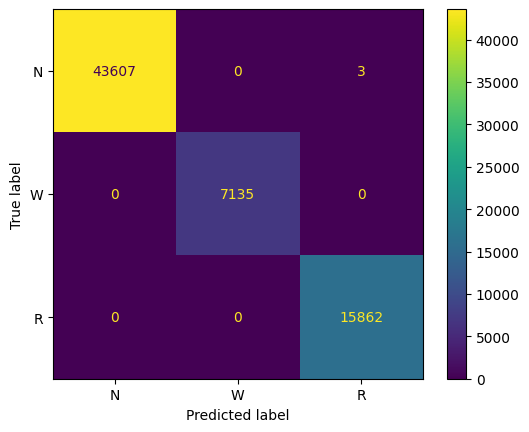

In [211]:
display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix , display_labels = os.listdir('./database/'))
display.plot()

plt.show()